In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import io
from PIL import Image
from matplotlib import image as mpimg
import pickle

In [1]:
#CNN ADAM
k_folds = [
    [[1586,95,58], [102,1577,161], [113,309,1409]],
    [[1590,90,59], [103,1549,188], [90,305,1436]],
    [[1599,88,52], [98,1565,177],  [116,276,1439]],
    [[1561,102,76], [104,1477,259], [77,222,1532]],
    [[1584,75,80],[ 110,1505,225], [87,240,1504]],
    [[1560,73,106], [106,1498,236], [91,231,1509]],
    [[1567,97,75], [101,1481,258], [ 91,222,1518]],
    [[1606,71,62], [126,1508 ,206], [114,242,1475]],
    [[1612,79,48], [ 105,1555,180], [98,242,1491]],
    [[1602,96,41], [ 119,1560,161], [ 126,240,1465]]

]

In [4]:
named_labels = ['MI', 'NORM', 'OTHER']
named_labels = np.array(named_labels)

In [5]:
def model_performance(data):
    cf_matrix = data
    performance_result = []
    mean_performance_result = []
    true_positive = np.diag(cf_matrix)
    false_negative = np.sum(cf_matrix, axis=1) - true_positive
    false_positive = np.sum(cf_matrix, axis=0) - true_positive
    true_negative = np.sum(cf_matrix) - (true_positive + false_negative + false_positive)
    # Calculate the total number of samples
    total_samples = sum(sum(row) for row in cf_matrix)


    accuracy = (true_positive + true_negative) / total_samples
    sensitivity = true_positive / (true_positive + false_negative)
    specificity = true_negative / (true_negative + false_positive)

    mean_accuracy = np.mean(accuracy)
    mean_sensitivity = np.mean(sensitivity)
    mean_specificity = np.mean(specificity)
    
    performance_result.extend((accuracy, sensitivity,  specificity))
    mean_performance_result.extend((mean_accuracy, mean_sensitivity,  mean_specificity))
    
    return cf_matrix, performance_result, mean_performance_result

In [15]:
def create_confusion_matrix(cf_matrix, no):
    # Create a heatmap using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap='Blues', xticklabels=named_labels, yticklabels=named_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - Fold {no} CNN')
    plt.show()

KFold  1
Mean Accuracy: 89.67%
Mean Sensitivity: 84.62%
Mean Specificity: 92.24%
--------------------------------------------------


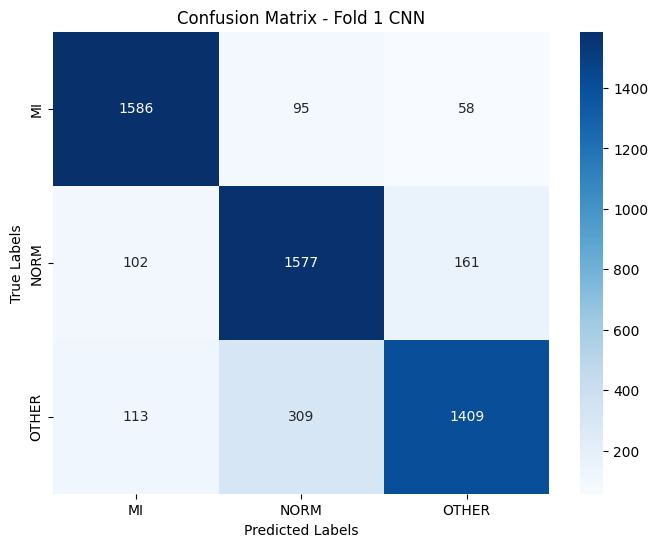

KFold  2
Mean Accuracy: 89.71%
Mean Sensitivity: 84.68%
Mean Specificity: 92.26%
--------------------------------------------------


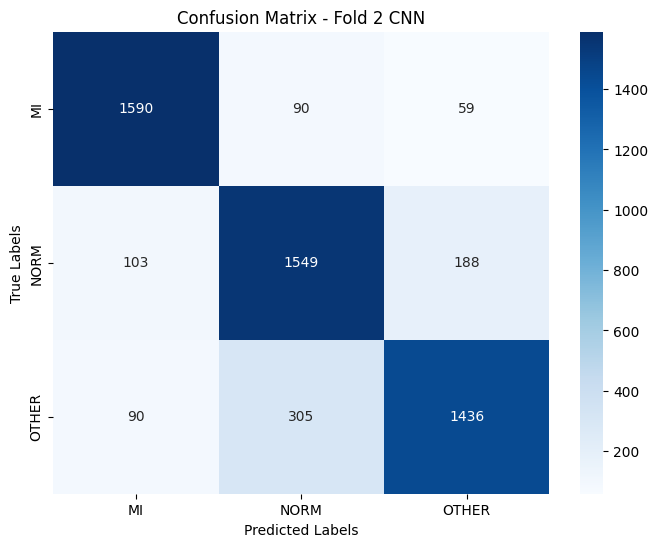

KFold  3
Mean Accuracy: 90.06%
Mean Sensitivity: 85.20%
Mean Specificity: 92.53%
--------------------------------------------------


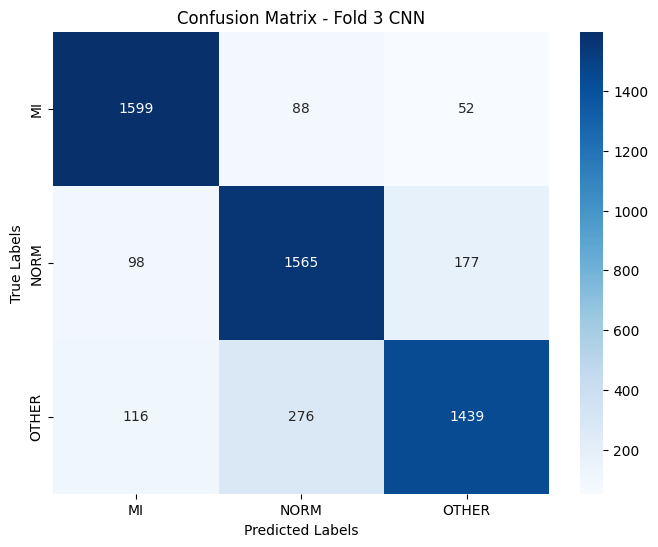

KFold  4
Mean Accuracy: 89.65%
Mean Sensitivity: 84.57%
Mean Specificity: 92.21%
--------------------------------------------------


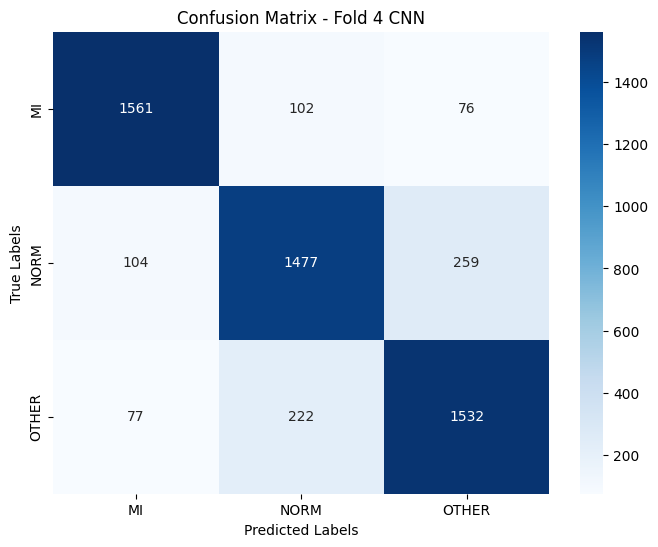

KFold  5
Mean Accuracy: 89.93%
Mean Sensitivity: 85.01%
Mean Specificity: 92.43%
--------------------------------------------------


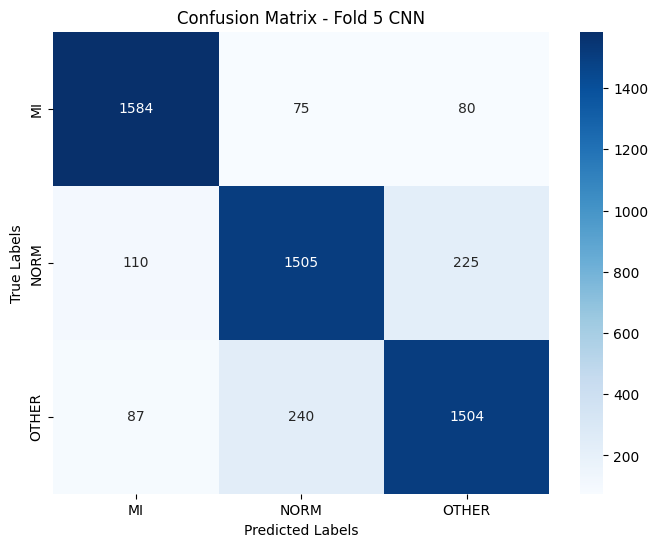

KFold  6
Mean Accuracy: 89.61%
Mean Sensitivity: 84.51%
Mean Specificity: 92.19%
--------------------------------------------------


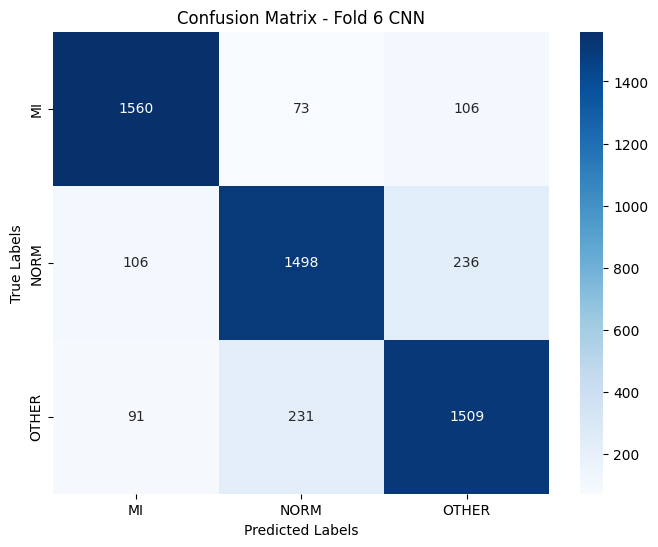

KFold  7
Mean Accuracy: 89.60%
Mean Sensitivity: 84.50%
Mean Specificity: 92.18%
--------------------------------------------------


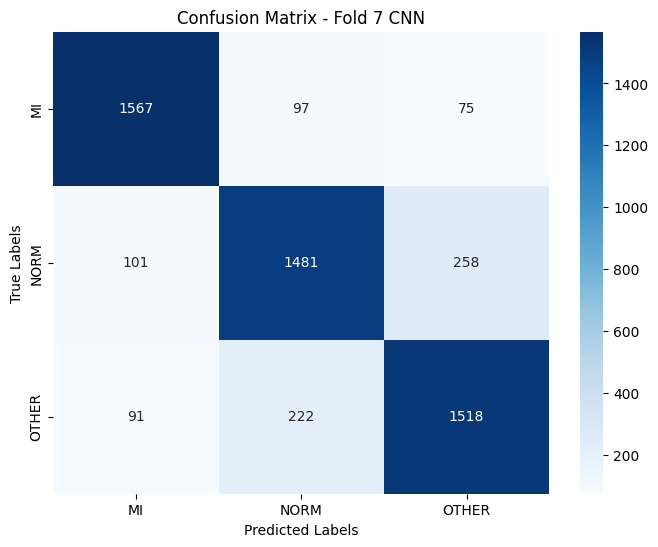

KFold  8
Mean Accuracy: 89.88%
Mean Sensitivity: 84.96%
Mean Specificity: 92.40%
--------------------------------------------------


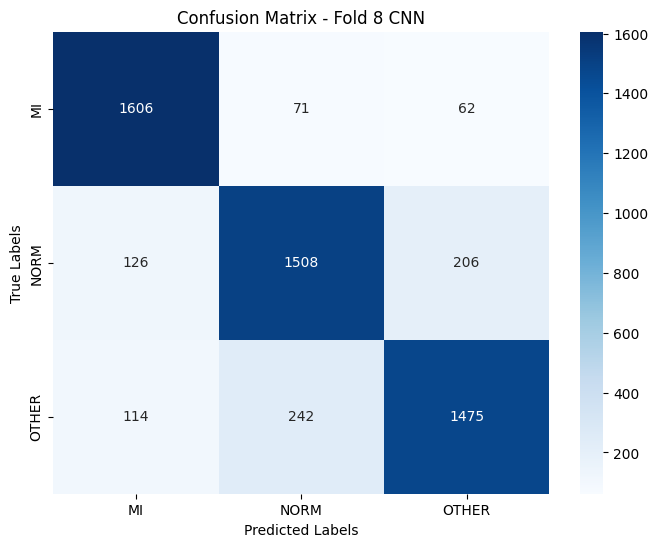

KFold  9
Mean Accuracy: 90.73%
Mean Sensitivity: 86.21%
Mean Specificity: 93.04%
--------------------------------------------------


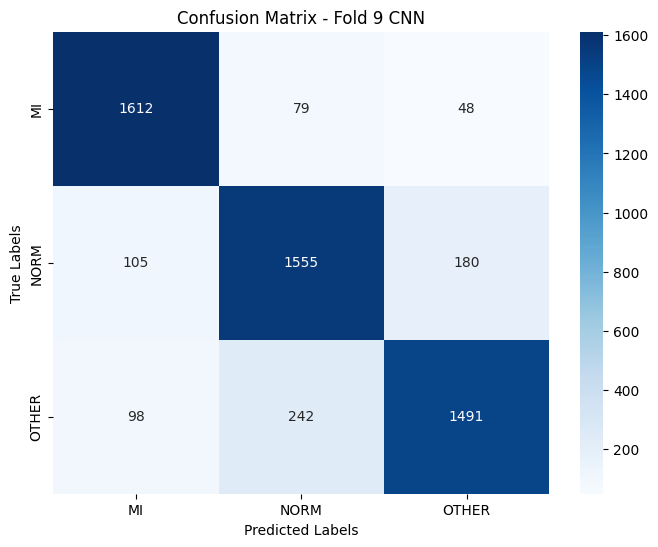

KFold  10
Mean Accuracy: 90.35%
Mean Sensitivity: 85.64%
Mean Specificity: 92.76%
--------------------------------------------------


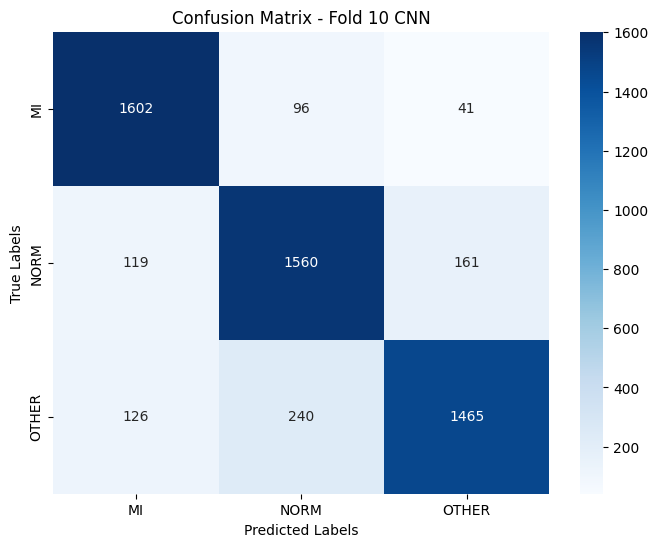

In [18]:
i = 1
for fold in k_folds :
    cf_matrix, performance_result, mean_performance_result = model_performance(fold)
    print("KFold ", i)
    formatted_mean_acc = "{:.2f}%".format(mean_performance_result[0]*100)
    formatted_mean_sensi = "{:.2f}%".format(mean_performance_result[1]*100)
    formatted_mean_spec = "{:.2f}%".format(mean_performance_result[2]*100)
    print("Mean Accuracy:", formatted_mean_acc)
    print("Mean Sensitivity:", formatted_mean_sensi)
    print("Mean Specificity:", formatted_mean_spec)
    print("--------------------------------------------------")
    
    create_confusion_matrix(fold, i)
    i = i + 1